# Random Forest Model

In [8]:
# Import libraries
import warnings;

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

warnings.filterwarnings("ignore")
sns.set()
sns.set_theme(style="whitegrid")

## Dataset

In [9]:
# Import dataset: dataset_logreg
df = pd.read_csv('dataset_tree.csv')
df.head()

,age,duration_latest,count_call_current,days_last_campaign,count_call_previous,evr_quarterly,cpi_monthly,cci_monthly,type_employment,highest_educ,...,home_loan_Cat_1_u***n,home_loan_Cat_2_y***s,personal_loan_Cat_1_u***n,personal_loan_Cat_2_y***s,contact_medium_Cat_1_t***e,dow_last_contacted_Cat_1_m***n,dow_last_contacted_Cat_2_t***u,dow_last_contacted_Cat_3_t***e,dow_last_contacted_Cat_4_w***d,credit_facility_Cat_1_u***n
0,57,8.770292,0.000000,0,1,-1.8,92.893,-46.2,0.163871,0.229763,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,55,8.227745,0.554826,0,0,1.1,93.994,-36.4,0.008372,0.042204,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,33,5.142826,0.000000,0,1,-1.8,92.893,-46.2,0.224534,0.147898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,8.678318,0.904026,0,0,1.4,94.465,-41.8,0.253336,0.229763,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,27,7.418466,0.554826,0,0,1.4,93.918,-42.7,0.025745,0.229763,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Define features and target variable
X = df.drop('Response', axis=1)
y = df[['Response']]

# Ensure the target variable is binary
y = y.astype('int')

# Check the shape of the features and target variable
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features shape: (34997, 25)
Target shape: (34997, 1)


## Modeling

In [11]:
# Hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Model training
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=100, cv=5, scoring='f1', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train.values.ravel())

# Best parameters
print("Best parameters found: ", rf_random.best_params_)

# Best score
print("Best score: ", rf_random.best_score_)

# Best estimator
best_rf_model = rf_random.best_estimator_

Best parameters found:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Best score:  0.5685004344599138


## Evaluation

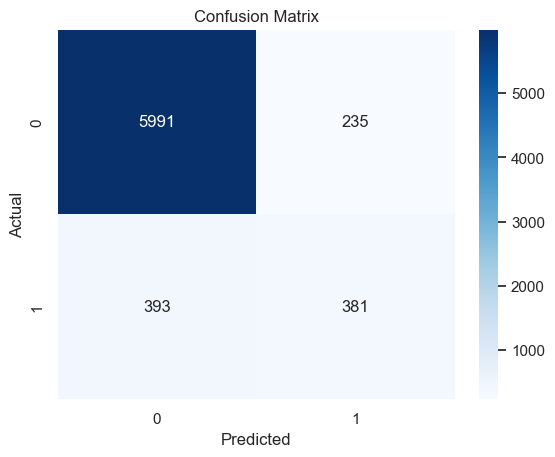

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6226
           1       0.62      0.49      0.55       774

    accuracy                           0.91      7000
   macro avg       0.78      0.73      0.75      7000
weighted avg       0.90      0.91      0.91      7000

ROC AUC Score: 0.9344
Accuracy Score: 0.9103


In [ ]:
# Making predictions
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

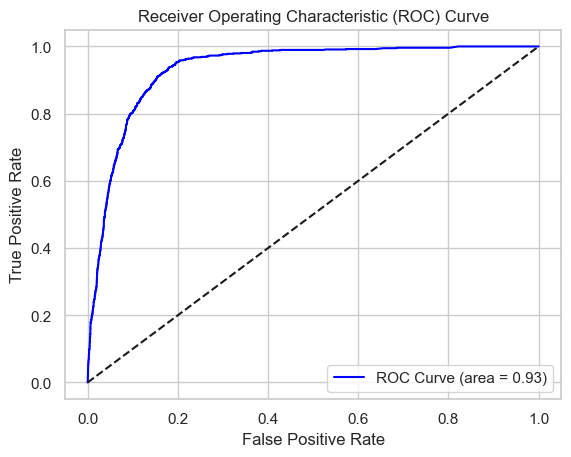

In [13]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()